# Exploring the Data from Pedestrian Injuries

This notebook will explore another dataset with the types of pedestrian accident injuries.

## Setup

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="dark")

In [26]:
raw_data = pd.read_csv("./data/Pedestrian_Collision_Injuries.csv")

In [27]:
raw_data.head()

,Admission Type,Year,Pedestrian Injury Type,Count
0,Emergency Department Visit,2013,"Pedestrian injured in collision with car, pick...",582.0
1,Emergency Department Visit,2014,"Pedestrian injured in collision with car, pick...",555.0
2,Emergency Department Visit,2015,"Pedestrian injured in collision with car, pick...",555.0
3,Emergency Department Visit,2016,"Pedestrian injured in collision with car, pick...",545.0
4,Emergency Department Visit,2017,"Pedestrian injured in collision with car, pick...",488.0


In [28]:
raw_data['Admission Type'].value_counts()

Admission Type
Emergency Department Visit    42
Hospital Admission            33
Name: count, dtype: int64

In [29]:
raw_data['Year'].value_counts()

Year
2014    14
2018    14
2016    13
2013    12
2015    12
2017    10
Name: count, dtype: int64

Uh oh, looks like this data is kinda old and not that useful to us right now.

In [30]:
raw_data['Pedestrian Injury Type'].value_counts()

Pedestrian Injury Type
Pedestrian injured in collision with car, pick-up truck or van              12
Pedestrian injured in collision with heavy transport vehicle or bus         12
Pedestrian injured in other and unspecified transport accidents             12
Pedestrian injured in collision with other nonmotor vehicle                 10
Pedestrian injured in collision with pedal cycle                            10
Pedestrian injured in collision with railway train or railway vehicle       10
Pedestrian injured in collision with two- or three-wheeled motor vehicle     9
Name: count, dtype: int64

In [31]:
raw_data.describe()

,Year,Count
count,75.000000,57.000000
mean,2015.493333,83.385965
std,1.734961,161.521201
min,2013.000000,1.000000
25%,2014.000000,7.000000
50%,2015.000000,18.000000
75%,2017.000000,61.000000
max,2018.000000,582.000000


In [32]:
raw_data.isnull().sum()

Admission Type             0
Year                       0
Pedestrian Injury Type     0
Count                     18
dtype: int64

In [33]:
mean_count = raw_data['Count'].mean()
raw_data['Count'].fillna(mean_count, inplace=True)

/var/folders/qw/y3ys43gs7cdblx18lvtrz8r40000gn/T/ipykernel_2635/1918922291.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  raw_data['Count'].fillna(mean_count, inplace=True)


In [34]:
raw_data.isnull().sum()

Admission Type            0
Year                      0
Pedestrian Injury Type    0
Count                     0
dtype: int64

## EDA
The data is pretty clean, so we can check in on the analysis

In [35]:
df = raw_data.copy()
df.head()

,Admission Type,Year,Pedestrian Injury Type,Count
0,Emergency Department Visit,2013,"Pedestrian injured in collision with car, pick...",582.0
1,Emergency Department Visit,2014,"Pedestrian injured in collision with car, pick...",555.0
2,Emergency Department Visit,2015,"Pedestrian injured in collision with car, pick...",555.0
3,Emergency Department Visit,2016,"Pedestrian injured in collision with car, pick...",545.0
4,Emergency Department Visit,2017,"Pedestrian injured in collision with car, pick...",488.0


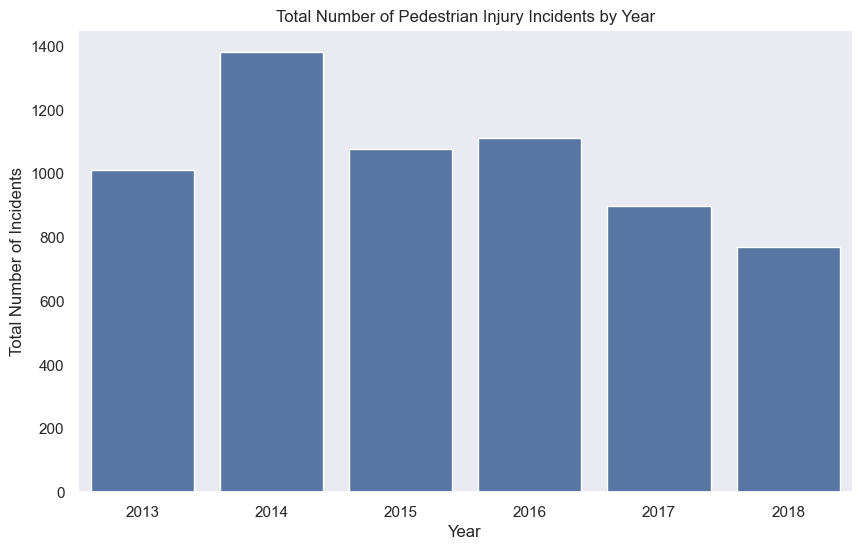

In [36]:
yearly_totals = df.groupby('Year')['Count'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=yearly_totals, x='Year', y='Count', order=sorted(yearly_totals['Year'].unique()))
plt.title('Total Number of Pedestrian Injury Incidents by Year')
plt.xlabel('Year')
plt.ylabel('Total Number of Incidents')
plt.show()

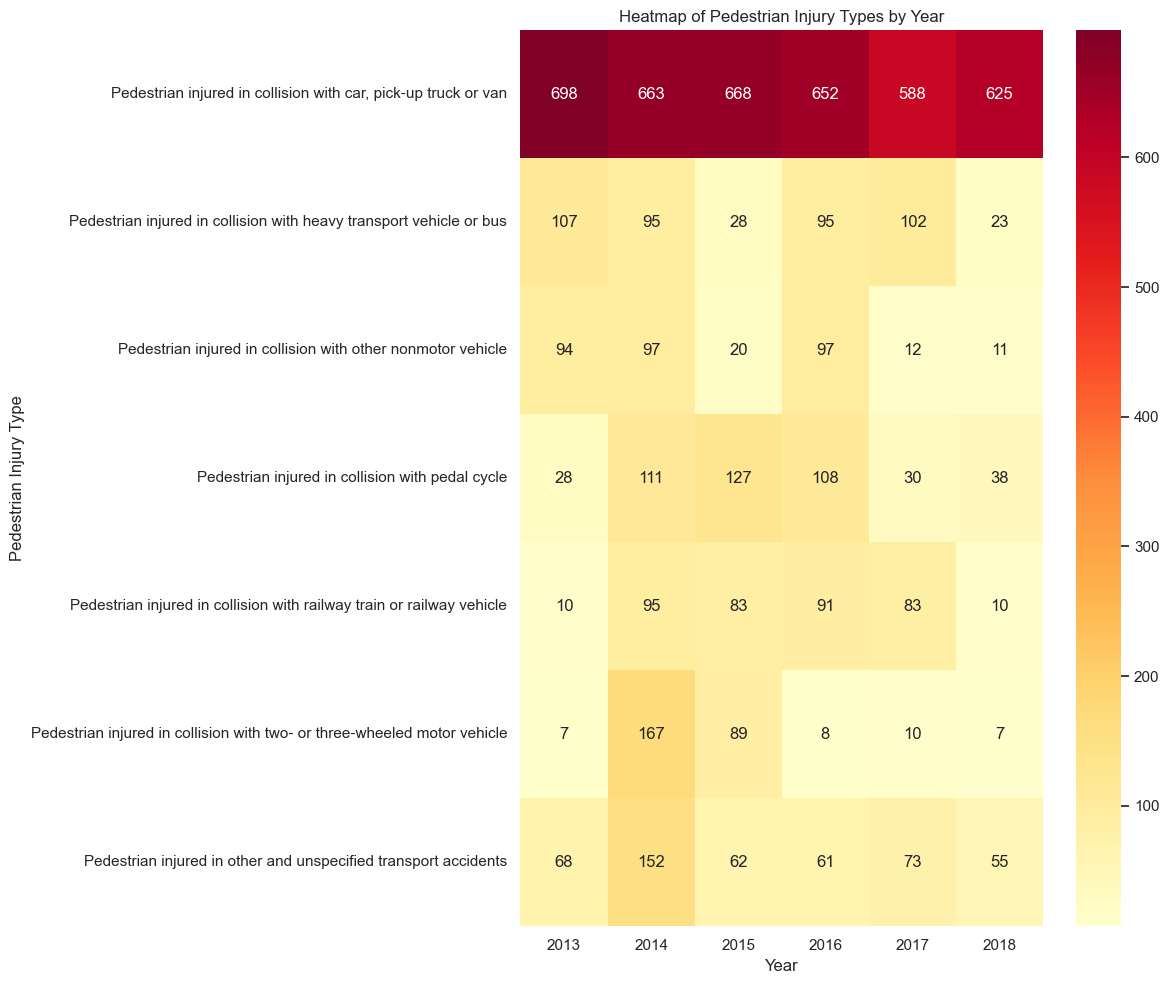

In [37]:
pivot_table = df.pivot_table(
    index='Pedestrian Injury Type',
    columns='Year',
    values='Count',
    aggfunc='sum',
    fill_value=0
)

plt.figure(figsize=(12, 10))
sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap="YlOrRd")
plt.title('Heatmap of Pedestrian Injury Types by Year')
plt.xlabel('Year')
plt.ylabel('Pedestrian Injury Type')
plt.tight_layout()
plt.show()

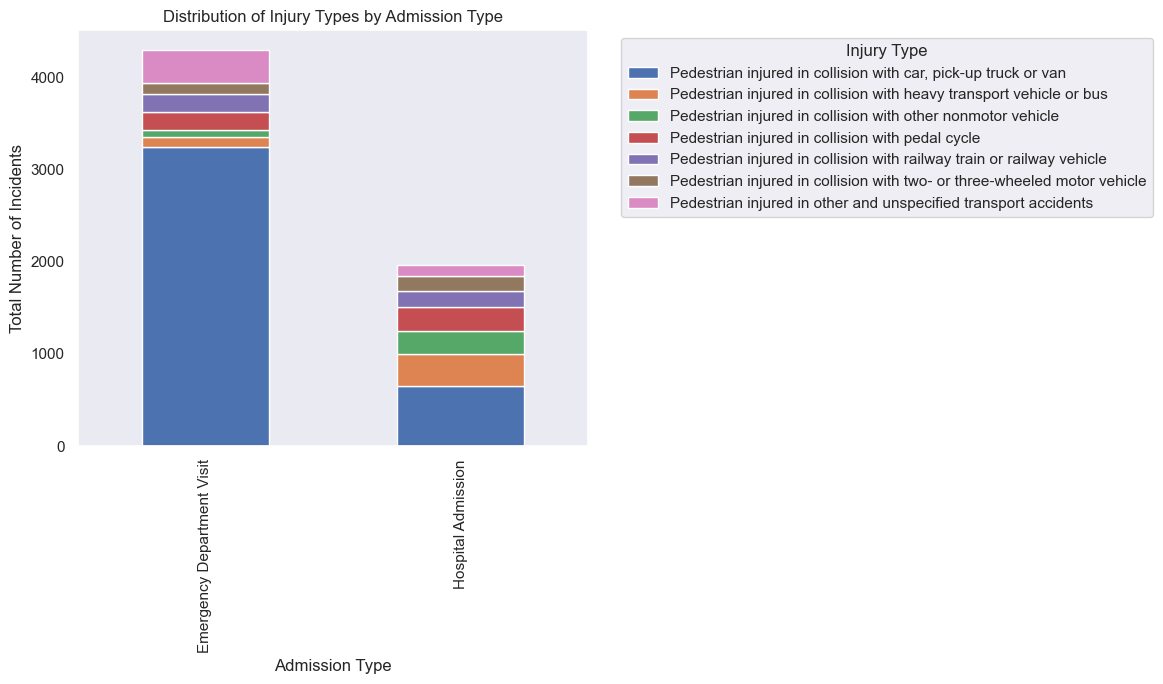

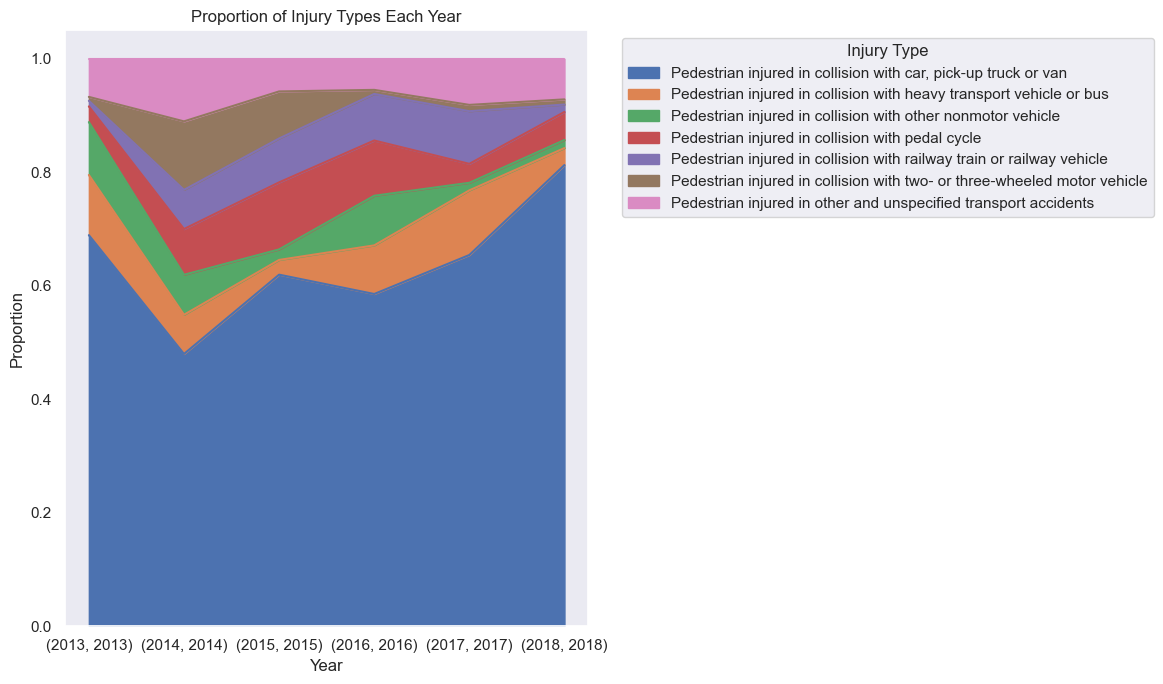

In [38]:
# 1. Distribution of injury types by admission type
injury_by_admission = df.groupby(['Admission Type', 'Pedestrian Injury Type'])['Count'].sum().unstack()
injury_by_admission.plot(kind='bar', stacked=True, figsize=(12, 7))
plt.title('Distribution of Injury Types by Admission Type')
plt.ylabel('Total Number of Incidents')
plt.xlabel('Admission Type')
plt.legend(title='Injury Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# 3. Proportion of each injury type per year
injury_type_year = df.groupby(['Year', 'Pedestrian Injury Type'])['Count'].sum().groupby(level=0).apply(lambda x: x / x.sum())
injury_type_year.unstack().plot(kind='area', stacked=True, figsize=(12, 7))
plt.title('Proportion of Injury Types Each Year')
plt.xlabel('Year')
plt.ylabel('Proportion')
plt.legend(title='Injury Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()